# Projet 4 
## Sujet : Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
## Des relevés minutieux ont été effectués par les agents de la ville en 2016. 
## Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.
## Voici le notebook exploratoire de cette analyse de données :

In [1]:
package_list = ['pandas', 'numpy', 'matplotlib', 'scikit-learn']

In [2]:
!python3 -V

Python 3.9.13


In [3]:
txt = !python3 -m pip freeze
check = lambda i : any([(pack in i) for pack in package_list])
txt = [i for i in txt if check (i)]
txt

['matplotlib @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_757ijfo2tl/croots/recipe/matplotlib-suite_1660167932741/work',
 'matplotlib-inline @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_9ddl71oqte/croots/recipe/matplotlib-inline_1662014471815/work',
 'numpy @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_10c245a1-1c81-453c-8b70-3e944787a8d9mo1xhesu/croots/recipe/numpy_and_numpy_base_1653915529188/work',
 'numpydoc @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_753dae38-7ca3-4e28-bd02-7f92dc5dac540wd4kft3/croots/recipe/numpydoc_1657529877062/work',
 'pandas==1.4.4',
 'scikit-learn @ file:///opt/concourse/worker/volumes/live/cffa5efe-beec-4a37-5774-350794e43990/volume/scikit-learn_1642617139916/work',
 'scikit-learn-intelex==2021.20221004.121333']

# 1. Imports

In [4]:
#builtin
import os

#data
import pandas as pd
import numpy as np

#preprocessing
#from sklearn.preprocessing import OneHotEncoder

# Pour traiter les données manquantes
from sklearn.impute import SimpleImputer

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Temps
from datetime import date, time, datetime



# 2. Data

In [5]:
df = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
df.OSEBuildingID.nunique()

3376

# 3. First Tour

## 3.1 Display

In [7]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [8]:
df.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,...,126774.3984,4.325542e+05,7203.419922,7.203420e+05,False,NaN,Compliant,NaN,41.27,2.26


In [9]:
df.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
614,820,2016,SPS-District K-12,K-12 School,Bailey Gatzert Elementary,1301 E. Yesler Way,Seattle,WA,98122.0,0007600137,...,573642.50000,1957268.0,0.000000,0.0,False,NaN,Missing Data,NaN,13.64,0.26
699,19662,2016,Multifamily MR (5-9),Mid-Rise Multifamily,El Capitan Apartments,1617 Yale Avenue,Seattle,WA,98101.0,0660002545,...,188487.20310,643118.0,19259.880860,1925988.0,False,NaN,Compliant,NaN,106.77,1.81
645,19448,2016,Multifamily LR (1-4),Low-Rise Multifamily,Magnolia Manor Apartments,4073 Gilman Ave W,Seattle,WA,98199.0,0369000780,...,203973.00000,695956.0,0.000000,0.0,False,NaN,Compliant,NaN,4.85,0.20
2219,24846,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Summit On California Condo HOA,4409 California Ave SW,Seattle,WA,98116.0,8083000000,...,279107.81250,952316.0,0.000000,0.0,False,NaN,Compliant,NaN,6.64,0.33
1558,22438,2016,NonResidential,Worship Facility,Quest Church,1401 NW Leary Way,Seattle,WA,98107.0,2768302590,...,79489.70313,271219.0,5150.350098,515035.0,False,NaN,Compliant,NaN,29.24,0.72


In [10]:
df.shape

(3376, 46)

## 3.2 Structure

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [12]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [13]:
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [14]:
#variable Comments
df.Comments

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3371   NaN
3372   NaN
3373   NaN
3374   NaN
3375   NaN
Name: Comments, Length: 3376, dtype: float64

## 3.3 Nan et duplicated

In [15]:
print(df.isna().sum())
print(df.shape)

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [16]:
df.duplicated().sum()

0

### Donc pas de ligne dupliquée

## 3.4 Data inspection

In [17]:
df.describe()
#Pas de résultat si les variables ne sont pas numériques

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [18]:
# observation de la colonne target1 : valeurs de la colonne et nombre de valeurs
df.loc[:, "SiteEnergyUse(kBtu)"].value_counts()

0.000000e+00    18
1.331470e+06     1
4.213894e+05     1
1.221342e+07     1
6.714540e+06     1
                ..
1.275236e+06     1
3.629066e+06     1
1.126157e+06     1
6.458022e+06     1
1.152896e+06     1
Name: SiteEnergyUse(kBtu), Length: 3354, dtype: int64

In [19]:
# observation de la colonne target2 : valeurs de la colonne et nombre de valeurs
df.loc[:, "TotalGHGEmissions"].value_counts()

0.00      9
3.95      7
5.46      6
4.20      6
4.76      5
         ..
199.79    1
92.58     1
47.70     1
90.31     1
41.27     1
Name: TotalGHGEmissions, Length: 2818, dtype: int64

# 4. Cleaning

## 4.1 Drop rows

In [20]:
df["BuildingType"].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [21]:
#suppression des logements autres que non-résidentiels (on ne garde que la catégorie dont on est
#sûr : "NonResidential"):

df = df[df["BuildingType"] == "NonResidential"]
df["BuildingType"].value_counts()

NonResidential    1460
Name: BuildingType, dtype: int64

In [22]:
#Exploration des données manquantes pour target1 :
df[df['SiteEnergyUse(kBtu)'].isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
2670,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING,4515 UNIVERSITY WAY NE,Seattle,WA,98105.0,8816401120,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN


In [23]:
# On observe que les bâtiments qui n'ont pas la consommation d'énergie totale indiquée n'ont pas 
# d'information non plus sur la consommation d'énergie (électricité, gaz), donc on supprime 
# ces bâtiments :

df.drop(df[df['SiteEnergyUse(kBtu)'].isna() == True].index, inplace = True)

In [24]:
#Vérification : 
print(df.isna().sum())
print(df.shape)

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                               0
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        662
SecondLargestPropertyUseTypeGFA     662


In [25]:
#Inspection des valeurs manquantes pour la target2 :
df[df.TotalGHGEmissions.isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


## Donc pas de valeur manquante pour la 2e cible.

## 4.2 Drop useless columns

In [26]:
# Exploration colonne "PrimaryPropertyType"
print(df["PrimaryPropertyType"].value_counts())
print()
print("Nombre de catégories d'utilisation principale des bâtiments non résidentiels : ", df["PrimaryPropertyType"].nunique())

Small- and Mid-Sized Office    287
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

Nombre de catégories d'utilisation principale des bâtiments non résidentiels :  21


In [27]:
# Exploration colonne "Neighborhood" :
df["Neighborhood"].value_counts()

DOWNTOWN                 340
GREATER DUWAMISH         312
LAKE UNION               140
MAGNOLIA / QUEEN ANNE    126
NORTHEAST                114
EAST                     111
NORTHWEST                 67
BALLARD                   52
NORTH                     45
CENTRAL                   38
SOUTHWEST                 32
DELRIDGE                  30
SOUTHEAST                 27
North                      8
Delridge                   4
Ballard                    4
Northwest                  4
Central                    4
Name: Neighborhood, dtype: int64

In [28]:
#Sélection des colonnes pertinentes :
df = df[["OSEBuildingID", "PropertyName", "Latitude", "Longitude", "YearBuilt", "PrimaryPropertyType", "Neighborhood", "NumberofBuildings", "NumberofFloors", "PropertyGFAParking", "Electricity(kWh)", "NaturalGas(therms)", "ENERGYSTARScore", "Outlier", "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]]
df.head()

,OSEBuildingID,PropertyName,Latitude,Longitude,YearBuilt,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,Outlier,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,Mayflower park hotel,47.61220,-122.33799,1927,Hotel,DOWNTOWN,1.0,12,0,1.156514e+06,12764.52930,60.0,NaN,7226362.5,249.98
1,2,Paramount Hotel,47.61317,-122.33393,1996,Hotel,DOWNTOWN,1.0,11,15064,9.504252e+05,51450.81641,61.0,NaN,8387933.0,295.86
2,3,5673-The Westin Seattle,47.61393,-122.33810,1969,Hotel,DOWNTOWN,1.0,41,196718,1.451544e+07,14938.00000,43.0,NaN,72587024.0,2089.28
3,5,HOTEL MAX,47.61412,-122.33664,1926,Hotel,DOWNTOWN,1.0,10,0,8.115253e+05,18112.13086,56.0,NaN,6794584.0,286.43
4,8,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,1980,Hotel,DOWNTOWN,1.0,18,62000,1.573449e+06,88039.98438,75.0,NaN,14172606.0,505.01


In [29]:
df.dtypes

OSEBuildingID            int64
PropertyName            object
Latitude               float64
Longitude              float64
YearBuilt                int64
PrimaryPropertyType     object
Neighborhood            object
NumberofBuildings      float64
NumberofFloors           int64
PropertyGFAParking       int64
Electricity(kWh)       float64
NaturalGas(therms)     float64
ENERGYSTARScore        float64
Outlier                 object
SiteEnergyUse(kBtu)    float64
TotalGHGEmissions      float64
dtype: object

In [30]:
#Année actuelle : 
today = date.today()
today.year


2023

In [31]:
#Inspection des valeurs de la colonne :
df["YearBuilt"].unique()

array([1927, 1996, 1969, 1926, 1980, 1904, 1998, 1928, 1922, 1930, 1983,
       1907, 1916, 1985, 2001, 1991, 1978, 1906, 1994, 1955, 1961, 1900,
       1954, 1911, 1973, 1920, 1910, 1982, 1908, 1959, 2000, 1997, 1999,
       1962, 1970, 2008, 1965, 1929, 2010, 1990, 1986, 2002, 1923, 2003,
       1941, 1915, 1958, 2009, 1971, 2004, 2007, 1951, 1964, 1953, 1937,
       1966, 1968, 2005, 1931, 1972, 1952, 1914, 1913, 1981, 1989, 1925,
       1976, 1950, 2006, 1909, 1988, 1979, 1947, 1984, 1956, 1912, 1977,
       1960, 1921, 1945, 1992, 1963, 1974, 1975, 1946, 1995, 1967, 1987,
       1949, 1940, 1932, 1948, 1938, 1957, 1993, 1918, 1905, 1902, 1924,
       1939, 1917, 1942, 1903, 2012, 2013, 1919, 1901, 1936, 1944, 1935,
       2011, 2014, 2015])

In [32]:
#Nombre de valeurs manquantes : 
df["YearBuilt"].isna().sum()

0

In [33]:
#Création d'une colonne nombre d'années depuis la construction et suppression de la colonne YearBuilt :
df['NumberOfYearsSinceConstruction'] = today.year - df["YearBuilt"]
df['NumberOfYearsSinceConstruction']

0       96
1       27
2       54
3       97
4       43
        ..
3338    68
3339    94
3340    10
3347     8
3356     8
Name: NumberOfYearsSinceConstruction, Length: 1458, dtype: int64

In [34]:
df = df[["OSEBuildingID", "PropertyName", "Latitude", "Longitude", "PrimaryPropertyType", "Neighborhood", "NumberOfYearsSinceConstruction", "NumberofBuildings", "NumberofFloors", "PropertyGFAParking", "Electricity(kWh)", "NaturalGas(therms)", "ENERGYSTARScore", "Outlier", "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]]
df.head()

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,Outlier,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,Mayflower park hotel,47.61220,-122.33799,Hotel,DOWNTOWN,96,1.0,12,0,1.156514e+06,12764.52930,60.0,NaN,7226362.5,249.98
1,2,Paramount Hotel,47.61317,-122.33393,Hotel,DOWNTOWN,27,1.0,11,15064,9.504252e+05,51450.81641,61.0,NaN,8387933.0,295.86
2,3,5673-The Westin Seattle,47.61393,-122.33810,Hotel,DOWNTOWN,54,1.0,41,196718,1.451544e+07,14938.00000,43.0,NaN,72587024.0,2089.28
3,5,HOTEL MAX,47.61412,-122.33664,Hotel,DOWNTOWN,97,1.0,10,0,8.115253e+05,18112.13086,56.0,NaN,6794584.0,286.43
4,8,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,Hotel,DOWNTOWN,43,1.0,18,62000,1.573449e+06,88039.98438,75.0,NaN,14172606.0,505.01


## 4.3 Outliers

In [35]:
#Exploration colonne "Outlier"
df["Outlier"].value_counts()

Low outlier     13
High outlier     2
Name: Outlier, dtype: int64

In [36]:
df[df["Outlier"].isna() == False]

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,Outlier,SiteEnergyUse(kBtu),TotalGHGEmissions
226,350,Second And Spring Building,47.60642,-122.33581,Large Office,DOWNTOWN,65,1.0,6,25920,1.166315e+07,16048.309570,NaN,High outlier,4.139950e+07,362.66
384,539,University Center,47.66178,-122.31812,Retail Store,NORTHEAST,36,1.0,2,0,9.348260e+04,0.000000,100.0,Low outlier,3.189628e+05,2.22
448,608,411 1ST AVE S (ID608),47.59878,-122.33458,Large Office,DOWNTOWN,110,5.0,7,0,4.715030e+05,3430.500488,100.0,Low outlier,1.119592e+07,29.43
517,704,401 Elliott Ave West,47.62235,-122.36378,Large Office,MAGNOLIA / QUEEN ANNE,23,1.0,4,42500,7.953454e+06,0.000000,1.0,High outlier,2.713719e+07,189.18
1045,20617,Seattle Habitat Store,47.56535,-122.34054,Retail Store,GREATER DUWAMISH,70,1.0,1,0,1.436250e+04,964.640015,100.0,Low outlier,1.454688e+05,5.46
1229,21315,1518 Fifith Ave,47.61119,-122.33581,Small- and Mid-Sized Office,DOWNTOWN,120,1.0,3,0,7.064900e+03,0.000000,NaN,Low outlier,2.410550e+04,0.17
1295,21474,The Lusty Lady,47.60711,-122.33886,Other,DOWNTOWN,123,1.0,3,0,1.298170e+04,0.000000,NaN,Low outlier,4.429350e+04,0.31
1611,22830,Freedom Church,47.51709,-122.37797,Worship Facility,SOUTHWEST,52,1.0,1,0,2.955500e+04,0.000000,100.0,Low outlier,1.008417e+05,0.70
1945,23912,1416 S Jackson,47.59973,-122.31331,Small- and Mid-Sized Office,CENTRAL,76,1.0,1,0,4.155460e+04,1430.729858,100.0,Low outlier,2.848573e+05,8.59
2129,24547,Islamic School of Seattle,47.60885,-122.29990,K-12 School,CENTRAL,94,1.0,2,0,4.729290e+04,0.000000,100.0,Low outlier,1.613634e+05,1.12


## On supprime ces bâtiments :

In [37]:
list_index = df[df["Outlier"].isna() == False].index
df.drop(list_index , inplace=True)
df.shape

(1443, 16)

In [38]:
#Suppression de la colonne "Outlier"
df.drop(columns = "Outlier", inplace = True)


### 4.3.1 Pour la consommation totale d'énergie

In [39]:
df.head()

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,Mayflower park hotel,47.61220,-122.33799,Hotel,DOWNTOWN,96,1.0,12,0,1.156514e+06,12764.52930,60.0,7226362.5,249.98
1,2,Paramount Hotel,47.61317,-122.33393,Hotel,DOWNTOWN,27,1.0,11,15064,9.504252e+05,51450.81641,61.0,8387933.0,295.86
2,3,5673-The Westin Seattle,47.61393,-122.33810,Hotel,DOWNTOWN,54,1.0,41,196718,1.451544e+07,14938.00000,43.0,72587024.0,2089.28
3,5,HOTEL MAX,47.61412,-122.33664,Hotel,DOWNTOWN,97,1.0,10,0,8.115253e+05,18112.13086,56.0,6794584.0,286.43
4,8,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,Hotel,DOWNTOWN,43,1.0,18,62000,1.573449e+06,88039.98438,75.0,14172606.0,505.01


In [40]:
df.isna().sum()

OSEBuildingID                       0
PropertyName                        0
Latitude                            0
Longitude                           0
PrimaryPropertyType                 0
Neighborhood                        0
NumberOfYearsSinceConstruction      0
NumberofBuildings                   0
NumberofFloors                      0
PropertyGFAParking                  0
Electricity(kWh)                    0
NaturalGas(therms)                  0
ENERGYSTARScore                   458
SiteEnergyUse(kBtu)                 0
TotalGHGEmissions                   0
dtype: int64

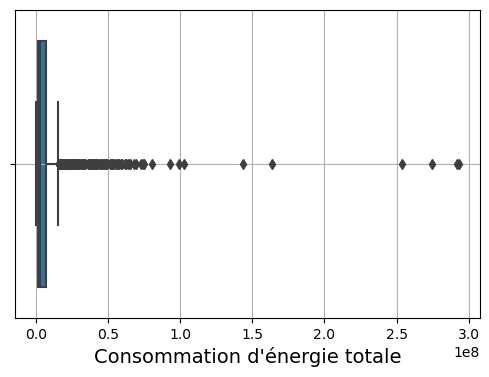

In [41]:
#Boîte à moustaches pour SiteEnergyUseWN(kBtu)
plt.figure(figsize=(6,4))
sns.boxplot(data = df, x = 'SiteEnergyUse(kBtu)', orient = "h")
plt.xlabel("Consommation d'énergie totale", fontsize = 14)
plt.grid()
plt.show()

In [42]:
#Liste des outliers pour SiteEnergyUseWN(kBtu)

q1_energy=df['SiteEnergyUse(kBtu)'].quantile(0.25)
q3_energy=df['SiteEnergyUse(kBtu)'].quantile(0.75)

IQR_energy=q3_energy-q1_energy

outliers_energy = pd.DataFrame()
outliers_energy = df[(df['SiteEnergyUse(kBtu)']<(q1_energy-1.5*IQR_energy)) | (df['SiteEnergyUse(kBtu)']>(q3_energy+1.5*IQR_energy))]

print(q1_energy-1.5*IQR_energy)
print(q3_energy+1.5*IQR_energy)

print("Liste des bâtiments avec valeurs extrêmes en consommation d'énergie totale :")
display(outliers_energy)
print(outliers_energy.shape)



-7401401.40625
15579222.84375
Liste des bâtiments avec valeurs extrêmes en consommation d'énergie totale :


,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
2,3,5673-The Westin Seattle,47.61393,-122.33810,Hotel,DOWNTOWN,54,1.0,41,196718,1.451544e+07,14938.00000,43.0,72587024.0,2089.28
10,15,Hotel Monaco Seattle,47.60695,-122.33414,Hotel,DOWNTOWN,54,1.0,11,19279,1.813490e+06,45918.50000,30.0,16016644.0,691.26
11,16,5679-W Seattle,47.60713,-122.33323,Hotel,DOWNTOWN,25,1.0,25,61161,5.299838e+06,28586.99805,36.0,26941110.0,740.97
13,18,Crowne Plaza Hotel Seattle,47.60809,-122.33212,Hotel,DOWNTOWN,43,1.0,33,57600,4.075083e+06,40834.39844,58.0,22325364.0,648.62
17,23,Renaissance Seattle Hotel,47.60681,-122.33078,Hotel,DOWNTOWN,40,1.0,28,85000,6.220773e+06,123314.75000,31.0,33556756.0,802.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,49972,Computer Science and Electrical Engineering,47.65356,-122.30613,University,NORTHEAST,25,1.0,6,0,8.386464e+06,0.00000,NaN,51168308.0,199.48
3278,49979,Lander Hall,47.65577,-122.31530,Residence Hall,NORTHEAST,70,1.0,0,0,2.609182e+06,70633.28906,19.0,15965859.0,437.20
3281,49985,Amazon Phase VI,47.62384,-122.33941,Large Office,LAKE UNION,9,1.0,6,0,4.165604e+06,21579.98438,99.0,16371039.0,213.70
3317,50031,Dexter Station,47.62906,-122.34259,Large Office,MAGNOLIA / QUEEN ANNE,8,1.0,10,0,4.968672e+06,18076.54883,NaN,18760766.0,214.19


(164, 15)


## Ce sont de grands hôtels ou bureaux

### 4.3.2 Pour les émissions de CO2

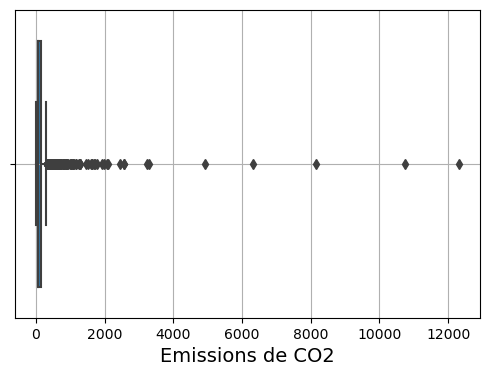

In [43]:
#Boîte à moustaches pour TotalGHGEmissions
plt.figure(figsize=(6,4))
sns.boxplot(data = df, x = 'TotalGHGEmissions', orient = "h")
plt.xlabel("Emissions de CO2", fontsize = 14)
plt.grid()
plt.show()

In [44]:
#Liste des outliers pour TotalGHGEmissions

q1_emission=df['TotalGHGEmissions'].quantile(0.25)
q3_emission=df['TotalGHGEmissions'].quantile(0.75)

IQR_emission=q3_emission-q1_emission

outliers_emission = pd.DataFrame()
outliers_emission = df[(df['TotalGHGEmissions']<(q1_emission-1.5*IQR_emission)) | (df['TotalGHGEmissions']>(q3_emission+1.5*IQR_emission))]

print(q1_emission-1.5*IQR_emission)
print(q3_emission+1.5*IQR_emission)

print("Liste des bâtiments avec valeurs extrêmes en émission de CO2 :")
display(outliers_emission)
print(outliers_emission.shape)


-152.2975
305.9225
Liste des bâtiments avec valeurs extrêmes en émission de CO2 :


,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
2,3,5673-The Westin Seattle,47.613930,-122.338100,Hotel,DOWNTOWN,54,1.0,41,196718,1.451544e+07,14938.00000,43.0,72587024.0,2089.28
4,8,WARWICK SEATTLE HOTEL (ID8),47.613750,-122.340470,Hotel,DOWNTOWN,43,1.0,18,62000,1.573449e+06,88039.98438,75.0,14172606.0,505.01
8,12,311wh-Pioneer Square,47.602940,-122.332630,Hotel,DOWNTOWN,119,1.0,15,0,2.138898e+06,64259.00000,43.0,13723820.0,392.16
10,15,Hotel Monaco Seattle,47.606950,-122.334140,Hotel,DOWNTOWN,54,1.0,11,19279,1.813490e+06,45918.50000,30.0,16016644.0,691.26
11,16,5679-W Seattle,47.607130,-122.333230,Hotel,DOWNTOWN,25,1.0,25,61161,5.299838e+06,28586.99805,36.0,26941110.0,740.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,49865,SOUTH,47.662460,-122.298980,Other,NORTHEAST,10,1.0,6,239252,3.614136e+06,136282.09380,NaN,25959642.0,809.76
3261,49926,SCCC MAIN BROADWAY/EDISON,47.617484,-122.321853,University,EAST,98,1.0,3,0,6.427496e+06,15353.41016,NaN,37022180.0,1280.81
3264,49940,Virginia Mason Medical Center - 2149,47.609860,-122.327740,Hospital,EAST,103,1.0,8,0,2.639522e+07,0.00000,74.0,163945984.0,6330.91
3278,49979,Lander Hall,47.655770,-122.315300,Residence Hall,NORTHEAST,70,1.0,0,0,2.609182e+06,70633.28906,19.0,15965859.0,437.20


(163, 15)


## Ce sont aussi de grands hôtels, bureaux, hopitaux

### 4.3.3 Pour la variable PropertyGFAParking (surface de parking)

In [45]:
#Liste des bâtiments avec une surface de parking de 0
df[df["PropertyGFAParking"] == 0]

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,Mayflower park hotel,47.61220,-122.33799,Hotel,DOWNTOWN,96,1.0,12,0,1.156514e+06,12764.529300,60.0,7.226362e+06,249.98
3,5,HOTEL MAX,47.61412,-122.33664,Hotel,DOWNTOWN,97,1.0,10,0,8.115253e+05,18112.130860,56.0,6.794584e+06,286.43
6,10,Camlin,47.61390,-122.33283,Hotel,DOWNTOWN,97,1.0,11,0,8.239199e+05,29475.800780,27.0,5.758795e+06,176.14
7,11,Paramount Theatre,47.61327,-122.33136,Other,DOWNTOWN,97,1.0,8,0,1.065843e+06,3851.890137,NaN,6.298132e+06,221.51
8,12,311wh-Pioneer Square,47.60294,-122.33263,Hotel,DOWNTOWN,119,1.0,15,0,2.138898e+06,64259.000000,43.0,1.372382e+07,392.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,50038,Salmon Bay Marine Center West,47.66144,-122.38723,Mixed Use Property,MAGNOLIA / QUEEN ANNE,9,1.0,2,0,1.840135e+05,0.000000,NaN,6.278541e+05,4.38
3322,50039,Honda of Seattle/Toyota of Seattle,47.58542,-122.32185,Other,GREATER DUWAMISH,8,1.0,2,0,1.099805e+06,12393.571290,NaN,4.991894e+06,91.98
3339,50069,Airport - Main Terminal,47.53161,-122.29944,Small- and Mid-Sized Office,GREATER DUWAMISH,94,1.0,2,0,6.351199e+05,22536.210940,9.0,4.420650e+06,134.80
3340,50070,Tennis Center Sand Point,47.68109,-122.26180,Other,NORTHEAST,10,1.0,1,0,5.573329e+05,10241.599610,NaN,2.925780e+06,67.65


## Ces bâtiments n'ont peut être effectivement pas de parking (comme le Paramount Theatre par exemple)

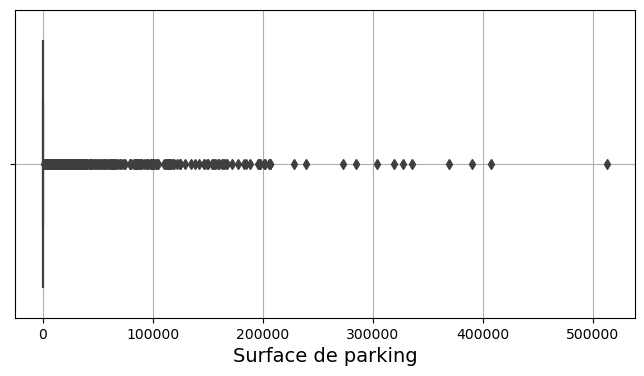

In [46]:
#Boîte à moustaches pour PropertyGFAParking
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = 'PropertyGFAParking', orient = "h")
plt.xlabel("Surface de parking", fontsize = 14)
plt.grid()
plt.show()

In [47]:
#Liste des outliers pour PropertyGFAParking

q1_park=df['PropertyGFAParking'].quantile(0.25)
q3_park=df['PropertyGFAParking'].quantile(0.75)

IQR_park=q3_park-q1_park

outliers_park = pd.DataFrame()
outliers_park = df[(df['PropertyGFAParking']<(q1_park-1.5*IQR_park)) | (df['PropertyGFAParking']>(q3_park+1.5*IQR_park))]

print(q1_park-1.5*IQR_park)
print(q3_park+1.5*IQR_park)

print("Liste des bâtiments avec valeurs extrêmes en surface de parking :")
display(outliers_park)
print("Nombre d'outliers concernant la surface de parking : ", outliers_park.shape[0])



0.0
0.0
Liste des bâtiments avec valeurs extrêmes en surface de parking :


,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
1,2,Paramount Hotel,47.61317,-122.33393,Hotel,DOWNTOWN,27,1.0,11,15064,9.504252e+05,51450.81641,61.0,8387933.0,295.86
2,3,5673-The Westin Seattle,47.61393,-122.33810,Hotel,DOWNTOWN,54,1.0,41,196718,1.451544e+07,14938.00000,43.0,72587024.0,2089.28
4,8,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,Hotel,DOWNTOWN,43,1.0,18,62000,1.573449e+06,88039.98438,75.0,14172606.0,505.01
10,15,Hotel Monaco Seattle,47.60695,-122.33414,Hotel,DOWNTOWN,54,1.0,11,19279,1.813490e+06,45918.50000,30.0,16016644.0,691.26
11,16,5679-W Seattle,47.60713,-122.33323,Hotel,DOWNTOWN,25,1.0,25,61161,5.299838e+06,28586.99805,36.0,26941110.0,740.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,50037,"MAPS 325 Ninth Avenue North, LLC",47.62146,-122.33976,Large Office,LAKE UNION,9,1.0,12,163260,3.356673e+06,12670.99023,99.0,12720069.0,147.14
3324,50045,"Sidneysea, LLC",47.62263,-122.33976,Large Office,LAKE UNION,8,1.0,12,166208,3.438751e+06,22656.19141,98.0,13998638.0,202.12
3337,50062,Olympic Hospitality,47.65476,-122.34732,Hotel,LAKE UNION,9,1.0,4,41539,1.206219e+06,19267.79102,72.0,6042399.5,131.02
3338,50068,Airport - Maintenance Shop - DOT: KCIA,47.54425,-122.31776,Warehouse,GREATER DUWAMISH,68,1.0,1,4222,2.147724e+05,28730.51953,37.0,3605855.5,157.70


Nombre d'outliers concernant la surface de parking :  319


## Pas de remarque sur ces bâtiments.



## 4.4 Nan

In [48]:
df.head()

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,Mayflower park hotel,47.61220,-122.33799,Hotel,DOWNTOWN,96,1.0,12,0,1.156514e+06,12764.52930,60.0,7226362.5,249.98
1,2,Paramount Hotel,47.61317,-122.33393,Hotel,DOWNTOWN,27,1.0,11,15064,9.504252e+05,51450.81641,61.0,8387933.0,295.86
2,3,5673-The Westin Seattle,47.61393,-122.33810,Hotel,DOWNTOWN,54,1.0,41,196718,1.451544e+07,14938.00000,43.0,72587024.0,2089.28
3,5,HOTEL MAX,47.61412,-122.33664,Hotel,DOWNTOWN,97,1.0,10,0,8.115253e+05,18112.13086,56.0,6794584.0,286.43
4,8,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,Hotel,DOWNTOWN,43,1.0,18,62000,1.573449e+06,88039.98438,75.0,14172606.0,505.01


In [49]:
df.isna().sum()

OSEBuildingID                       0
PropertyName                        0
Latitude                            0
Longitude                           0
PrimaryPropertyType                 0
Neighborhood                        0
NumberOfYearsSinceConstruction      0
NumberofBuildings                   0
NumberofFloors                      0
PropertyGFAParking                  0
Electricity(kWh)                    0
NaturalGas(therms)                  0
ENERGYSTARScore                   458
SiteEnergyUse(kBtu)                 0
TotalGHGEmissions                   0
dtype: int64

In [50]:
df["ENERGYSTARScore"].value_counts()

100.0    30
98.0     26
95.0     25
89.0     24
96.0     21
         ..
36.0      3
28.0      3
39.0      3
46.0      3
9.0       3
Name: ENERGYSTARScore, Length: 100, dtype: int64

In [51]:
df.isna().sum()

OSEBuildingID                       0
PropertyName                        0
Latitude                            0
Longitude                           0
PrimaryPropertyType                 0
Neighborhood                        0
NumberOfYearsSinceConstruction      0
NumberofBuildings                   0
NumberofFloors                      0
PropertyGFAParking                  0
Electricity(kWh)                    0
NaturalGas(therms)                  0
ENERGYSTARScore                   458
SiteEnergyUse(kBtu)                 0
TotalGHGEmissions                   0
dtype: int64

## 4.4 Heatmap

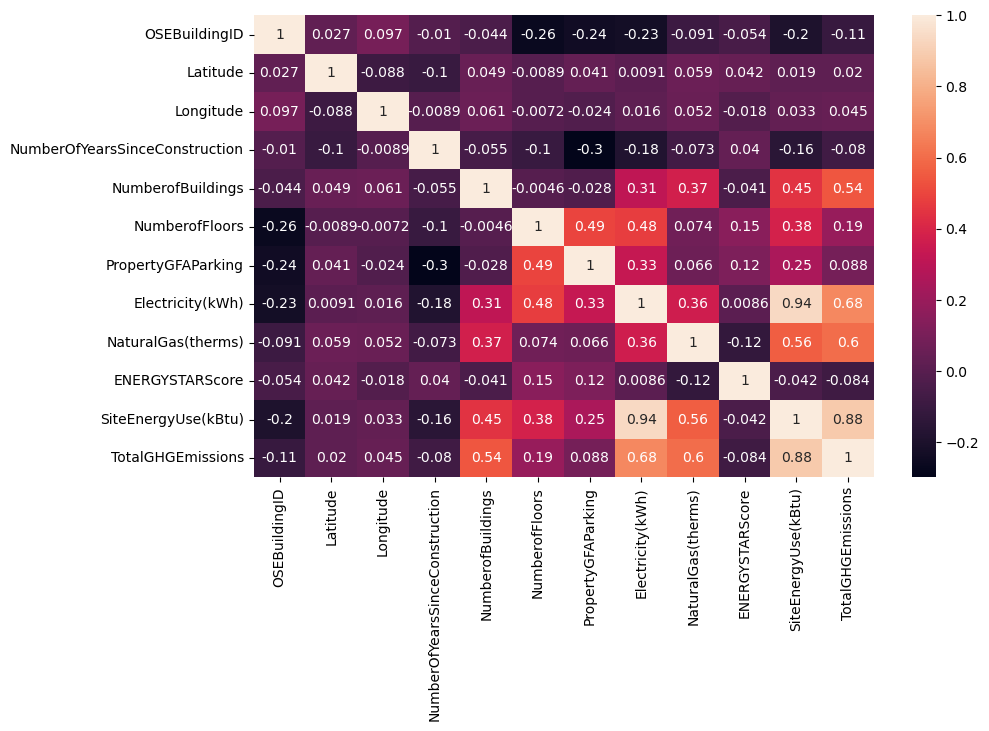

In [52]:
df_copy = df
df_copy.dropna()
df_heat = df_copy.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(df_heat, annot=True)
plt.show()

## On observe une corrélation certaine entre les 2 targets : consommation totale d'énergie (SiteEnergyUse(kBtu)) et émission de CO2 (TotalGHGEmissions) et entre PropertyGFAParking et NumberofFloors, ainsi qu'entre NumberofBuildings et gaz, électricité, CO2

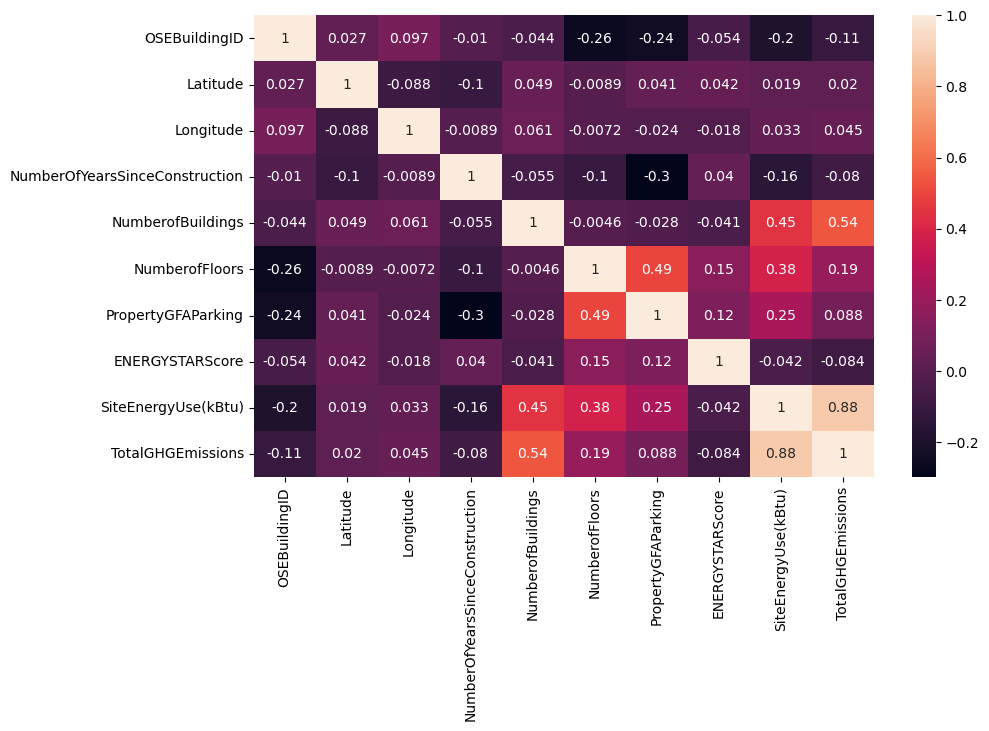

In [53]:
#Heatmap sans électricité et gaz :
df_copy2 = df_copy.drop(['Electricity(kWh)', 'NaturalGas(therms)'], axis = 1)
df_copy2.dropna()
df_heat = df_copy2.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(df_heat, annot=True)
plt.show()

## 4.5 Création d'une colonne Source d'énergie, et suppression de l'électricité et gaz

In [54]:
df[df['Electricity(kWh)'] == 0]

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
304,435,Washington State Convention Center,47.61195,-122.33167,Other,DOWNTOWN,33,1.0,6,0,0.0,0.0000,NaN,0.0,0.00
426,23854,Pier 57,47.60613,-122.34115,Restaurant,DOWNTOWN,123,1.0,1,0,0.0,115080.3516,NaN,11508035.0,611.19
513,700,IUC- Whole Foods Interbay,47.63718,-122.37734,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,15,1.0,1,0,0.0,0.0000,31.0,12525174.0,0.00
746,19776,Welcome Home Society - PriceCo,47.72777,-122.34503,Other,NORTHWEST,21,1.0,1,0,0.0,0.0000,NaN,0.0,0.00


In [55]:
df[df['NaturalGas(therms)'] == 0]

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,Electricity(kWh),NaturalGas(therms),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
25,31,Seattle Honda,47.61500,-122.33081,Other,DOWNTOWN,93,1.0,2,0,3.840083e+05,0.0,NaN,1.310237e+06,9.13
36,46,Seattle 11-13,47.51138,-122.28875,Warehouse,GREATER DUWAMISH,62,3.0,2,0,1.310995e+07,0.0,NaN,4.473116e+07,311.84
44,57,5th and Pine,47.61130,-122.33659,Large Office,DOWNTOWN,50,1.0,5,0,2.794889e+06,0.0,78.0,9.536161e+06,66.48
46,59,Gibraltar Tower,47.61048,-122.33794,Small- and Mid-Sized Office,DOWNTOWN,113,1.0,8,0,1.486510e+06,0.0,14.0,5.071974e+06,35.36
65,96,Central Seattle,47.60845,-122.32637,Mixed Use Property,EAST,40,1.0,6,9341,2.973421e+06,0.0,NaN,1.547312e+07,481.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,49972,Computer Science and Electrical Engineering,47.65356,-122.30613,University,NORTHEAST,25,1.0,6,0,8.386464e+06,0.0,NaN,5.116831e+07,199.48
3279,49980,Mercer Hall,47.65447,-122.31733,Residence Hall,NORTHEAST,53,1.0,0,0,2.040124e+06,0.0,16.0,6.960904e+06,48.53
3294,50002,Audi Seattle UVA Bldg,47.66414,-122.31664,Other,NORTHEAST,9,1.0,3,0,4.101939e+05,0.0,NaN,1.399582e+06,9.76
3321,50038,Salmon Bay Marine Center West,47.66144,-122.38723,Mixed Use Property,MAGNOLIA / QUEEN ANNE,9,1.0,2,0,1.840135e+05,0.0,NaN,6.278541e+05,4.38


In [56]:
#Création d'une variable source d'énergie :
df['energy_source'] = np.nan
df.loc[(df['Electricity(kWh)'] == 0) & (df['NaturalGas(therms)'] == 0), 'energy_source'] = 'Source non connue'
df.loc[(df['Electricity(kWh)'] == 0) & (df['NaturalGas(therms)'] != 0), 'energy_source'] = 'Electricity'
df.loc[(df['Electricity(kWh)'] != 0) & (df['NaturalGas(therms)'] == 0), 'energy_source'] = 'Gaz'
df.loc[(df['Electricity(kWh)'] != 0) & (df['NaturalGas(therms)'] != 0), 'energy_source'] = 'Electricity & Gaz'

In [57]:
#Suppression des 2 variables sur l'énergie : 'Electricity(kWh)' et 'NaturalGas(therms)' qui 
#ne seront plus relevées à l'avenir :
df = df.drop(['Electricity(kWh)', 'NaturalGas(therms)'], axis = 1)

In [58]:
df.isna().sum()

OSEBuildingID                       0
PropertyName                        0
Latitude                            0
Longitude                           0
PrimaryPropertyType                 0
Neighborhood                        0
NumberOfYearsSinceConstruction      0
NumberofBuildings                   0
NumberofFloors                      0
PropertyGFAParking                  0
ENERGYSTARScore                   458
SiteEnergyUse(kBtu)                 0
TotalGHGEmissions                   0
energy_source                       0
dtype: int64

# 5. Export .csv

In [59]:
df.head()

,OSEBuildingID,PropertyName,Latitude,Longitude,PrimaryPropertyType,Neighborhood,NumberOfYearsSinceConstruction,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,energy_source
0,1,Mayflower park hotel,47.61220,-122.33799,Hotel,DOWNTOWN,96,1.0,12,0,60.0,7226362.5,249.98,Electricity & Gaz
1,2,Paramount Hotel,47.61317,-122.33393,Hotel,DOWNTOWN,27,1.0,11,15064,61.0,8387933.0,295.86,Electricity & Gaz
2,3,5673-The Westin Seattle,47.61393,-122.33810,Hotel,DOWNTOWN,54,1.0,41,196718,43.0,72587024.0,2089.28,Electricity & Gaz
3,5,HOTEL MAX,47.61412,-122.33664,Hotel,DOWNTOWN,97,1.0,10,0,56.0,6794584.0,286.43,Electricity & Gaz
4,8,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,Hotel,DOWNTOWN,43,1.0,18,62000,75.0,14172606.0,505.01,Electricity & Gaz


In [60]:
df.shape

(1443, 14)

In [61]:
df.to_csv("df_cleaned.csv", index = False)
#index = False pour éviter la colonne Unamed : 0